# Project3 Q8, Q9 An-Te Huang
This script contains methods using mapclassify and methods I hardcode by myself.    
I use 5 classes when hardcoding.


In [1]:
import gdal 
import geopandas as gpd
import mapclassify as mc
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read data
fpath='C:/Users/zxc78/Desktop/GIS/Assignment3/states/state_with_population.shp'
shp=gpd.read_file(fpath)
dshp=dict(shp)


## Quantile 

In [3]:
def quantile(N, P):
    N=sorted(N)
    n = int(round(P * len(N) + 0.5))
    return N[n-1]
def quantiles_hardcode(dshp):
    # Assuming 5 classes
    v1=quantile(dshp['POP1996'],0.2)
    v2=quantile(dshp['POP1996'],0.4)
    v3=quantile(dshp['POP1996'],0.6)
    v4=quantile(dshp['POP1996'],0.8)
    # my result
    print('my result:')
    print(v1,v2,v3,v4)
    #compare to mapclassify module
    scheme = mc.Quantiles(shp['POP1996'],5)
    print('mapclassify module result')
    print(scheme)

In [4]:
print(np.quantile(dshp['POP1996'],0.2))
print(quantile(dshp['POP1996'],0.2))
#My result fits numpy result

1201327.0
1201327


In [5]:
quantiles_hardcode(dshp)
# My result fit mapclassify result

my result:
1201327 2708787 4334057 7280830
mapclassify module result
Quantiles                         

         Interval            Count
----------------------------------
[  487142.00,  1201327.00] |    11
( 1201327.00,  2708787.00] |    10
( 2708787.00,  4334057.00] |    10
( 4334057.00,  7280830.00] |    10
( 7280830.00, 32218713.00] |    10


The break points are the same

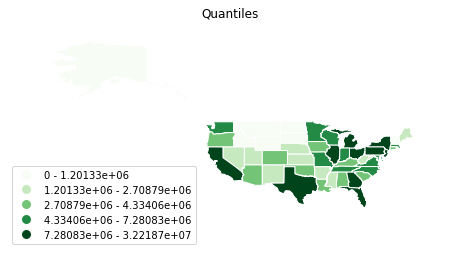

In [6]:
# Print quantile
scheme = mc.Quantiles(shp['POP1996'],k=5)

gplt.choropleth(
    shp, hue='POP1996',
    edgecolor='white', linewidth=1,
    cmap='Greens',
    legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme
    )
plt.title('Quantiles')
plt.show()


## Equal Interval

In [7]:
def EqualInterval_hardcode(dshp):
    #Assuming 5 classes
    maxx=max(dshp['POP1996'])
    minn=min(dshp['POP1996'])
    interval=(maxx-minn)/5
    v1=minn+interval
    v2=minn+2*interval
    v3=minn+3*interval
    v4=minn+4*interval
    print('My result')
    print(v1,v2,v3,v4)
    scheme = mc.EqualInterval(shp['POP1996'],k=5)
    print('Mapclassify result')
    print(scheme)
EqualInterval_hardcode(dshp)


My result
6833456.2 13179770.4 19526084.6 25872398.8
Mapclassify result
EqualInterval                     

         Interval            Count
----------------------------------
[  487142.00,  6833456.20] |    40
( 6833456.20, 13179770.40] |     7
(13179770.40, 19526084.60] |     3
(19526084.60, 25872398.80] |     0
(25872398.80, 32218713.00] |     1


The break points are the same

EqualInterval                     

         Interval            Count
----------------------------------
[  487142.00,  6833456.20] |    40
( 6833456.20, 13179770.40] |     7
(13179770.40, 19526084.60] |     3
(19526084.60, 25872398.80] |     0
(25872398.80, 32218713.00] |     1


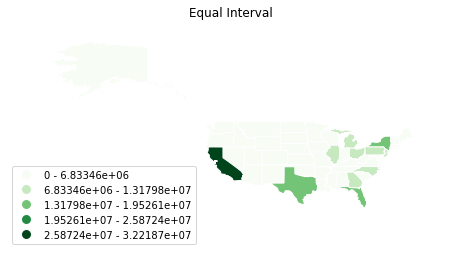

In [8]:
def EqualInterval(shp,col,num_of_classes):
    scheme = mc.EqualInterval(shp[col],k=num_of_classes)
    print(scheme)
    gplt.choropleth(
        shp, hue=col,
        edgecolor='white', linewidth=1,
        cmap='Greens',
        legend=True, legend_kwargs={'loc': 'lower left'},
        scheme=scheme
    )
    plt.title('Equal Interval')
    plt.show()
EqualInterval(shp,'POP1996',5)

## Standard deviation

In [9]:
def std_hardcode(dshp):
    # Assuming 5 classes
    n=len(dshp['POP1996'])
    summ=0
    for i in range(n):
        summ=summ+dshp['POP1996'][i]
    meann=summ/n# or np.mean()
    err=0
    for i in range(n):
        err=err+(dshp['POP1996'][i]-meann)**2
    stdd=np.sqrt(err/(n-1)) #or np.std()
    v1=meann-1.5*stdd
    v2=meann-0.5*stdd
    v3=meann+0.5*stdd
    v4=meann+1.5*stdd
    print(v1,v2,v3,v4)
    scheme = mc.StdMean(shp['POP1996'])
    print(scheme)
std_hardcode(dshp)

-3533376.325890568 2286750.3358142553 8106876.997519079 13927003.659223903
StdMean                           

         Interval            Count
----------------------------------
(       -inf, -6443439.66] |     0
(-6443439.66,  -623313.00] |     0
( -623313.00, 11016940.33] |    44
(11016940.33, 16837066.99] |     4
(16837066.99, 32218713.00] |     3


The reason they are different is because mapclassify module uses mean + 1std, mean+2std ..., while I use mean +0.5 std, mean+1.5std...(According to your lecture note). I will show they are the same when using the same formula.

In [10]:
def std_hardcode2(dshp):
    # Assuming 5 classes
    n=len(dshp['POP1996'])
    summ=0
    for i in range(n):
        summ=summ+dshp['POP1996'][i]
    meann=summ/n# or np.mean()
    err=0
    for i in range(n):
        err=err+(dshp['POP1996'][i]-meann)**2
    stdd=np.sqrt(err/(n-1)) #or np.std()
    v1=meann-2*stdd
    v2=meann-1*stdd
    v3=meann+1*stdd
    v4=meann+2*stdd
    print(v1,v2,v3,v4)
    scheme = mc.StdMean(shp['POP1996'])
    print(scheme)
std_hardcode2(dshp)

-6443439.65674298 -623312.9950381564 11016940.328371491 16837066.990076315
StdMean                           

         Interval            Count
----------------------------------
(       -inf, -6443439.66] |     0
(-6443439.66,  -623313.00] |     0
( -623313.00, 11016940.33] |    44
(11016940.33, 16837066.99] |     4
(16837066.99, 32218713.00] |     3


Now they are the same.

StdMean                           

         Interval            Count
----------------------------------
(       -inf, -6443439.66] |     0
(-6443439.66,  -623313.00] |     0
( -623313.00, 11016940.33] |    44
(11016940.33, 16837066.99] |     4
(16837066.99, 32218713.00] |     3


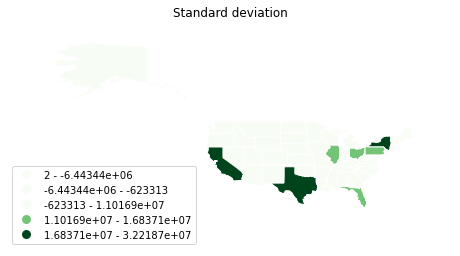

In [11]:
def Std(shp,col):
    scheme = mc.StdMean(shp[col])
    print(scheme)
    gplt.choropleth(
        shp, hue=col,
        edgecolor='white', linewidth=1,
        cmap='Greens',
        legend=True, legend_kwargs={'loc': 'lower left'},
        scheme=scheme
    )
    plt.title('Standard deviation')
    plt.show()
Std(shp,'POP1996')

## Natural Breaks

NaturalBreaks                     

         Interval            Count
----------------------------------
[  487142.00,  3296088.00] |    25
( 3296088.00,  7956917.00] |    18
( 7956917.00, 14300634.00] |     5
(14300634.00, 19045232.00] |     2
(19045232.00, 32218713.00] |     1


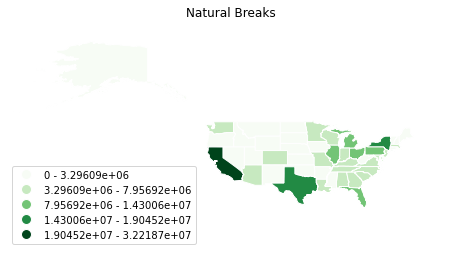

In [12]:
def NaturalBreaks(shp,col,num_of_classes):
    scheme = mc.NaturalBreaks(shp[col],k=num_of_classes)
    print(scheme)
    gplt.choropleth(
        shp, hue=col,
        edgecolor='white', linewidth=1,
        cmap='Greens',
        legend=True, legend_kwargs={'loc': 'lower left'},
        scheme=scheme
    )
    plt.title('Natural Breaks')
    plt.show()
NaturalBreaks(shp,'POP1996',5)